# SDE

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import warnings
import matplotlib.pyplot as plt
warnings.filterwarnings("ignore")
plt.rcParams["figure.figsize"] = (16, 6)
# %matplotlib inline

In [2]:
df=pd.read_csv('Placement_Data_Collection(Responses).csv')
df.head()

,GENDER,CGPA,ACTIVE BACKLOG,COMMUNICATION SKILL,CODING SKILL,APTITUDE SKILLS,APPLIED PROFILE,PROJECT,INTERNSHIP,PLACED
0,Male,9.00,No,7,3,7,DATA SCIENTIST/ANALYST,Yes,No,No
1,Female,8.68,No,7,5,8,CORE,Yes,No,Yes
2,Male,8.34,No,7,5,7,"DATA SCIENTIST/ANALYST, CORE",Yes,Yes,No
3,Male,8.79,No,5,4,6,CORE,No,No,Yes
4,Male,7.58,No,9,9,10,"SDE, DATA SCIENTIST/ANALYST",Yes,No,Yes


In [3]:
df.head()

,GENDER,CGPA,ACTIVE BACKLOG,COMMUNICATION SKILL,CODING SKILL,APTITUDE SKILLS,APPLIED PROFILE,PROJECT,INTERNSHIP,PLACED
0,Male,9.00,No,7,3,7,DATA SCIENTIST/ANALYST,Yes,No,No
1,Female,8.68,No,7,5,8,CORE,Yes,No,Yes
2,Male,8.34,No,7,5,7,"DATA SCIENTIST/ANALYST, CORE",Yes,Yes,No
3,Male,8.79,No,5,4,6,CORE,No,No,Yes
4,Male,7.58,No,9,9,10,"SDE, DATA SCIENTIST/ANALYST",Yes,No,Yes


In [4]:
df.isna().sum()

GENDER                 0
CGPA                   0
ACTIVE BACKLOG         0
COMMUNICATION SKILL    0
CODING SKILL           0
APTITUDE SKILLS        0
APPLIED PROFILE        0
PROJECT                0
INTERNSHIP             0
PLACED                 0
dtype: int64

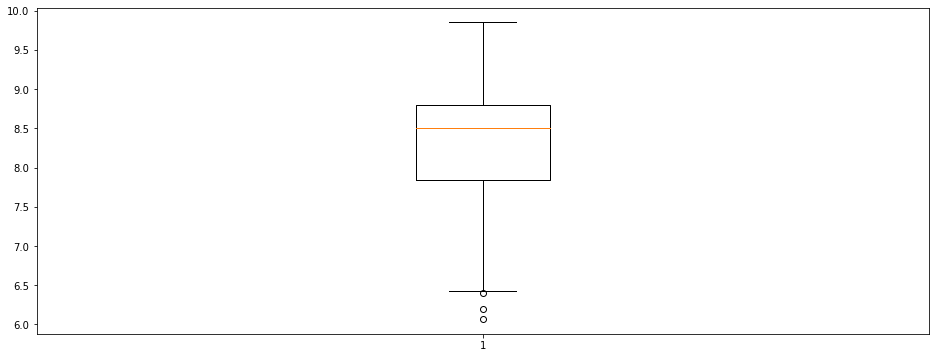

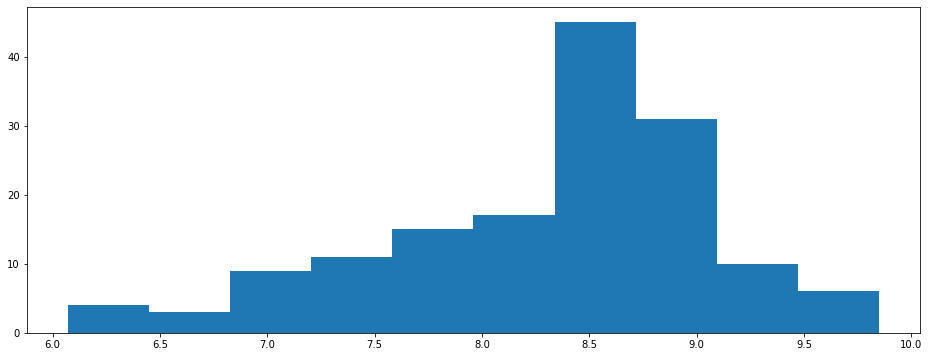

In [5]:
import matplotlib.pyplot as plt
x=df['CGPA']
y=df['PLACED']

plt.boxplot(x)
plt.show()
# plt.figure(figsize=(12,7))
plt.hist(x)
plt.show()

CONCLUSION : 8.5 IS THE MEDIAN CGPA.  
ALMOST ALL STUDENTS COME IN RANGE 6.5 TO 9.8 STUDENTS IN THIS RANGE ARE PLACED AS WELL UNPLACED , NO CONCLUSION CAN BE MADE HERE.   
WE NEED TO SEPARATE THE DATA  ACCORDING TO THEIR APPLIED PROFILE LIKE SDE, DATA, CORE.

In [6]:
df['PLACED'].value_counts()


Yes    102
No      49
Name: PLACED, dtype: int64

In [7]:
sde = df.loc[(df['APPLIED PROFILE'] == 'SDE') | (df['APPLIED PROFILE'] == 'SDE, DATA SCIENTIST/ANALYST') | (df['APPLIED PROFILE'] =='SDE, DATA SCIENTIST/ANALYST, MANAGEMENT, CORE')]
print(sde.shape)
sde.head()

(42, 10)


,GENDER,CGPA,ACTIVE BACKLOG,COMMUNICATION SKILL,CODING SKILL,APTITUDE SKILLS,APPLIED PROFILE,PROJECT,INTERNSHIP,PLACED
4,Male,7.58,No,9,9,10,"SDE, DATA SCIENTIST/ANALYST",Yes,No,Yes
7,Male,8.10,No,9,8,8,SDE,Yes,No,Yes
9,Male,7.58,No,8,8,9,"SDE, DATA SCIENTIST/ANALYST",Yes,No,No
13,Male,8.12,No,9,9,9,"SDE, DATA SCIENTIST/ANALYST, MANAGEMENT, CORE",Yes,Yes,Yes
15,Male,8.38,No,7,3,6,SDE,Yes,No,Yes


In [8]:
sde.drop(['APPLIED PROFILE'], axis=1, inplace=True)

In [9]:
sde.head()

,GENDER,CGPA,ACTIVE BACKLOG,COMMUNICATION SKILL,CODING SKILL,APTITUDE SKILLS,PROJECT,INTERNSHIP,PLACED
4,Male,7.58,No,9,9,10,Yes,No,Yes
7,Male,8.10,No,9,8,8,Yes,No,Yes
9,Male,7.58,No,8,8,9,Yes,No,No
13,Male,8.12,No,9,9,9,Yes,Yes,Yes
15,Male,8.38,No,7,3,6,Yes,No,Yes


### Gender based analysis

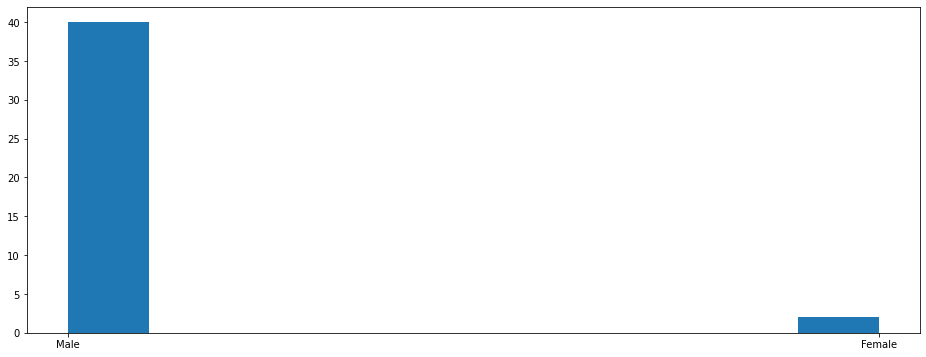

Number of males who sat for placement in SDE is 40
Number of males who got placed is 30
Number of females who sat for placement in SDE is 2
Number of females who got placed is 2


In [10]:
plt.hist(sde['GENDER'])
plt.show()
print(f"Number of males who sat for placement in SDE is {sde.loc[(sde['GENDER'] == 'Male')].shape[0]}")
print(f"Number of males who got placed is {sde.loc[(sde['GENDER'] == 'Male') & (sde['PLACED']=='Yes')].shape[0]}")
print(f"Number of females who sat for placement in SDE is {sde.loc[(sde['GENDER'] == 'Female')].shape[0]}")
print(f"Number of females who got placed is {sde.loc[(sde['GENDER'] == 'Female') & (sde['PLACED']=='Yes')].shape[0]}")

P(placed|male) = 30/40 **i.e. 75% of the males got placed**

P(placed|female) = 1 **i.e. All females got placed**

### CGPA based analysis

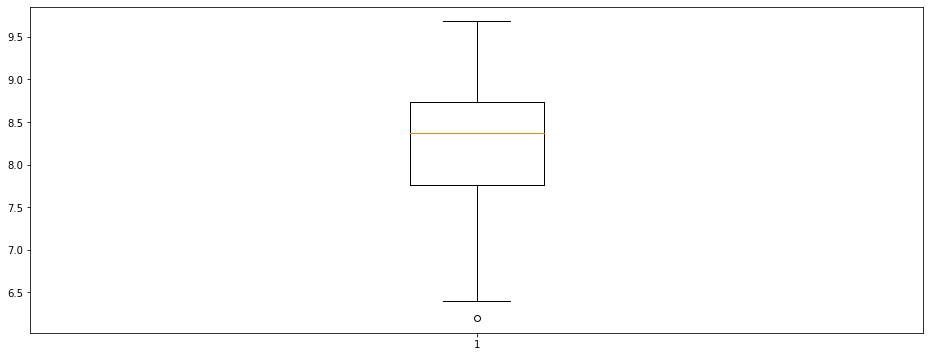

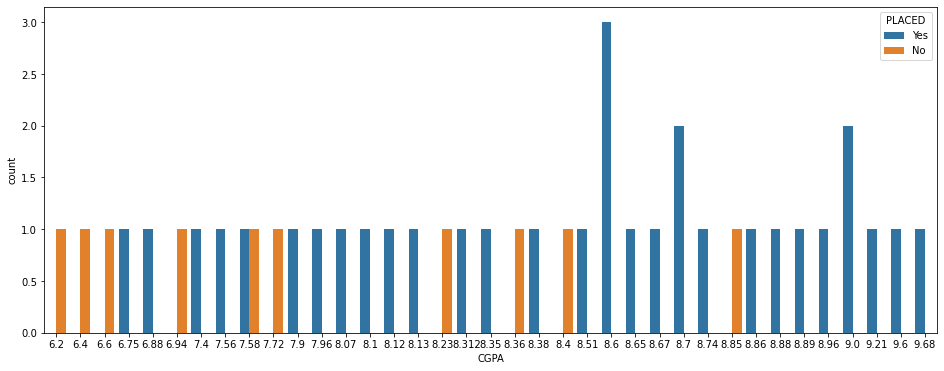

In [11]:
x=sde['CGPA']
y=sde['PLACED']
plt.boxplot(x)
plt.show()
sns.countplot(x,hue=y)
plt.show()

In [12]:
sdecgpa = sde.loc[(sde['CGPA'] >=8)]
print(sdecgpa.shape)

(29, 9)


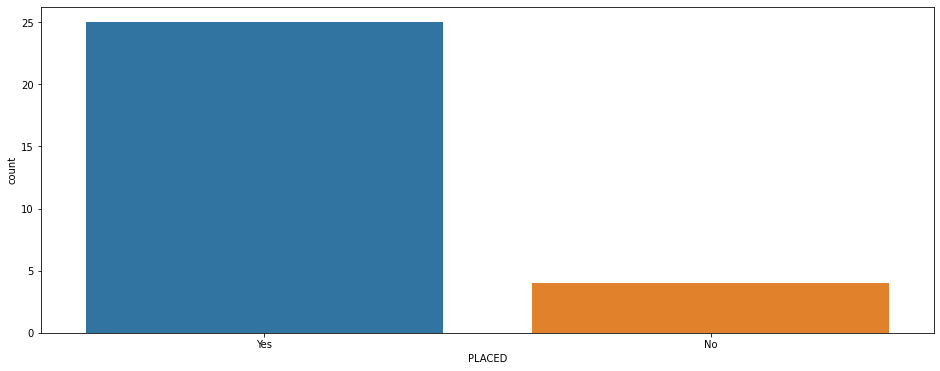

In [13]:
sns.countplot(sdecgpa['PLACED'])
plt.show()

P(placed|CGPA>=8) = 25/29 **i.e  86.21% of the people having cgpa >=8 got placed**

P(not placed | CGPA>=8) = 4/29 **i.e 13.7% of the people having cgpa >=8 are unplaced**

### Backlog based analysis

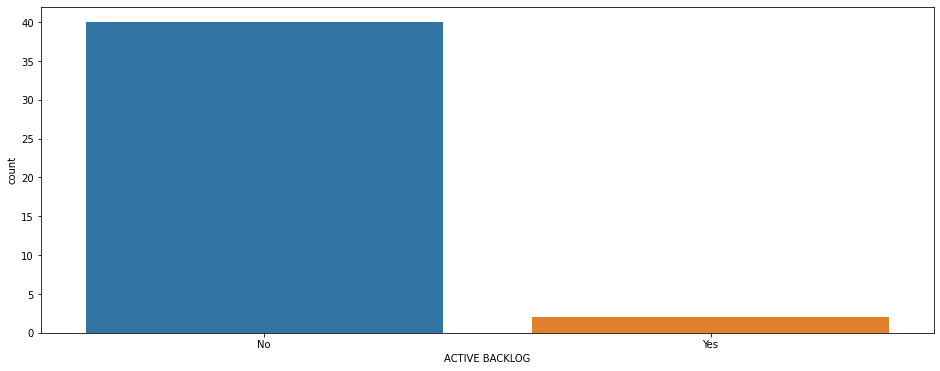

Number of students having backlog are  2
Number of students having backlog and placed are  2
Number of students having backlog and unplaced are  0


In [14]:
sns.countplot(sde['ACTIVE BACKLOG'])
plt.show()
print('Number of students having backlog are ',sde.loc[(sde['ACTIVE BACKLOG'] == 'Yes')].shape[0])
print('Number of students having backlog and placed are ',sde.loc[(sde['ACTIVE BACKLOG'] == 'Yes') & (sde['PLACED']=='Yes')].shape[0])
print('Number of students having backlog and unplaced are ',sde.loc[(sde['ACTIVE BACKLOG'] == 'Yes') & (sde['PLACED']=='No')].shape[0])

***due to shortage of the data of backlog students so we cannot conclude anything from this analysis***

### Communication based analysis

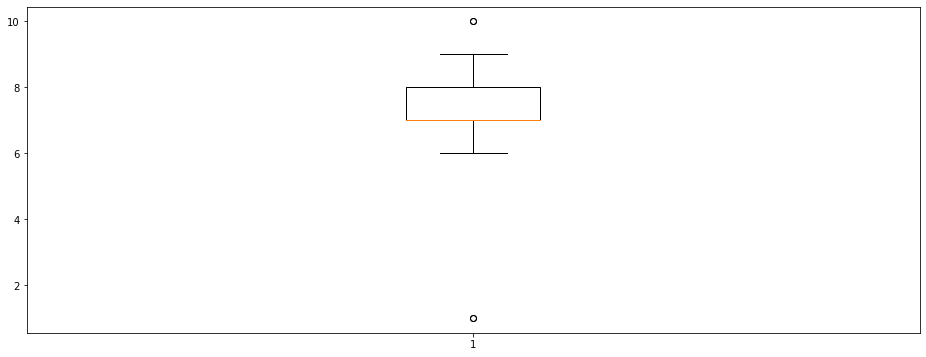

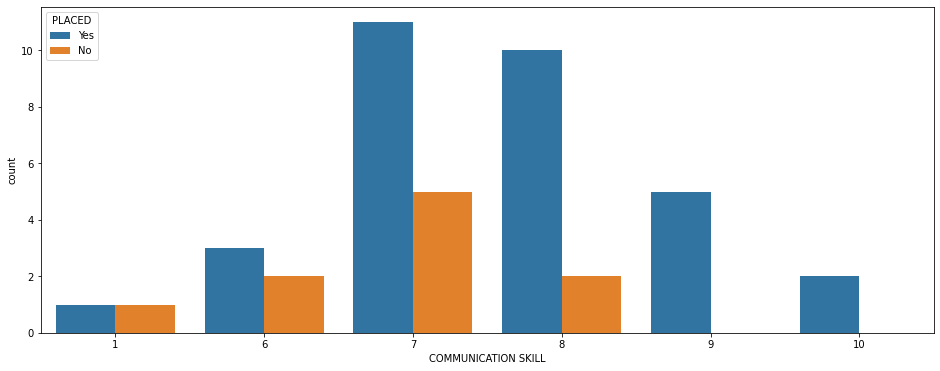

In [15]:

x1=sde['COMMUNICATION SKILL']
y=sde['PLACED']
plt.boxplot(x1)
plt.show()
sns.countplot(x1, hue=y)
plt.show()

In [16]:
sdecom = sde.loc[(sde['COMMUNICATION SKILL'] >=7.0)]
print('number of students having Communication skills more than 7 is ',sdecom.shape[0])

number of students having Communication skills more than 7 is  35


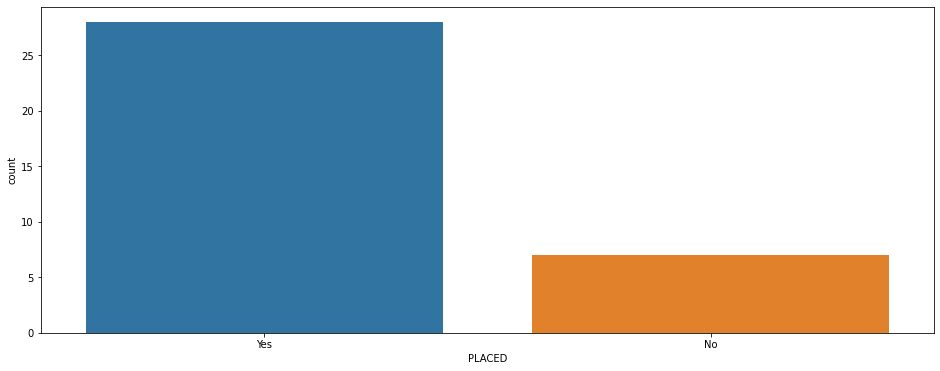

In [17]:
sns.countplot(sdecom['PLACED'])
plt.show()

P(placed| communication > 7.0) = 28/35 **i.e. 80% of the students with CS>=7 got placed**

P(not-placed| communication > 7.0) = 7/35 **i.e. 20% are unplaced**

### Coding skill based analysis

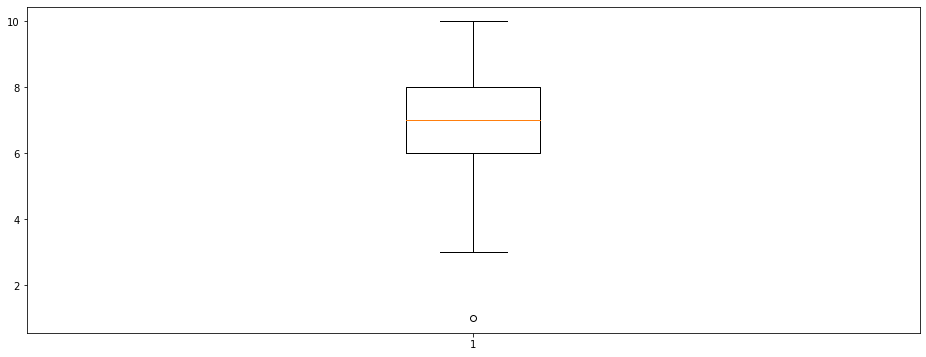

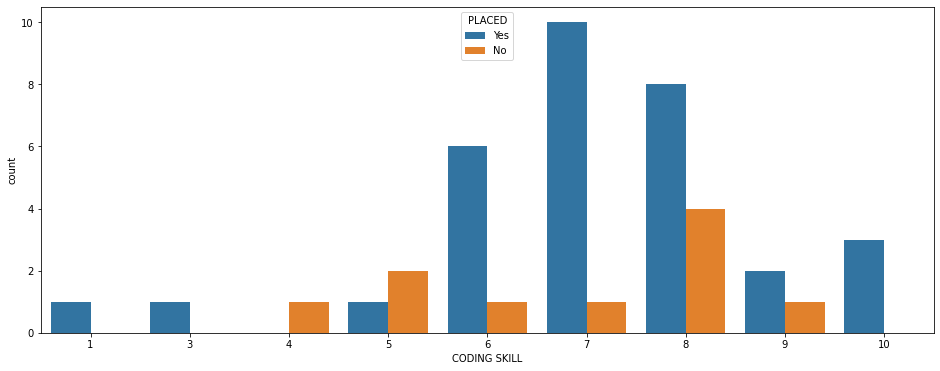

In [18]:
x2=sde['CODING SKILL']
y=sde['PLACED']
plt.boxplot(x2)
plt.show()
sns.countplot(x2, hue=y)
plt.show()


In [19]:
sdecode = sde.loc[(sde['CODING SKILL'] >=7.0)]
print('Number of students having coding skill more than 7 is' ,sdecode.shape[0])

Number of students having coding skill more than 7 is 29


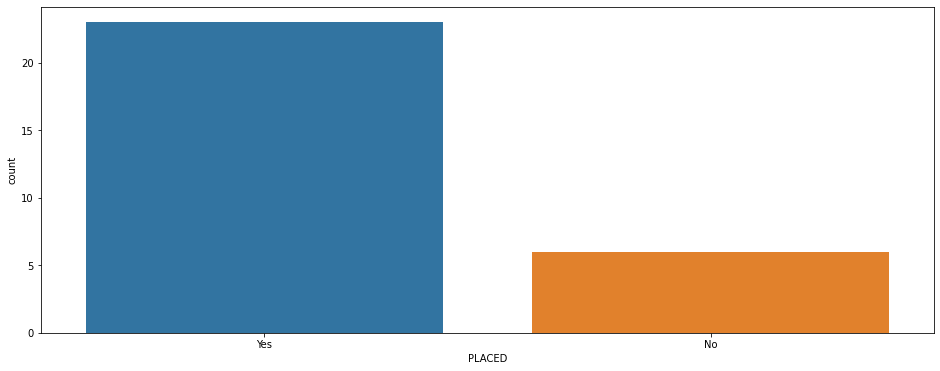

In [20]:
sns.countplot(sdecode['PLACED'])
plt.show()

P(placed | coding skills>=7.0) = 22/29 **i.e. 76% of the students having COS>=7 got placed**  
P(not placed | coding skills>=7.0) = 7/29 **i.e. 24% of the students are unplaced**

### Project based analysis

In [21]:
sde['PROJECT'].value_counts()

Yes    30
No     12
Name: PROJECT, dtype: int64

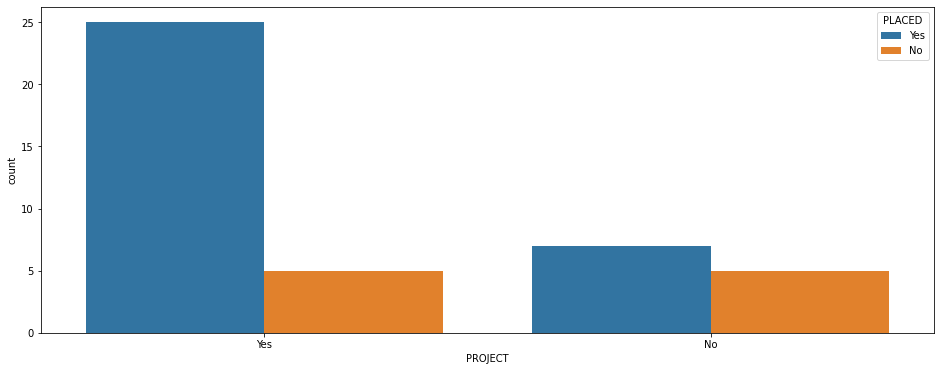

In [22]:
sns.countplot(sde['PROJECT'],hue=sde['PLACED'])
plt.show()

In [23]:
print('Number of students done the project in applied profile is',sde[sde['PROJECT']=='Yes'].shape[0])
print('Number of students done the project and are placed is',sde[(sde['PROJECT']=='Yes') & (sde['PLACED']=='Yes')].shape[0])
print('Number of students who had not done the project and got placed is',sde[(sde['PROJECT']=='No') & (sde['PLACED']=='Yes')].shape[0])

Number of students done the project in applied profile is 30
Number of students done the project and are placed is 25
Number of students who had not done the project and got placed is 7


Probability(placed | project) = 25/30  **i.e. 83% of the students who had done the  project in applied profile and are placed**

Probability(not placed |project) = 5/30 **i.e. 17% of the students who had done the project in applied profile and are not placed**

Probability(placed | no project) = 7/12 **i.e. 58% of the students who had not done the  project in applied profile and are placed** 

## Data preprocessing

In [24]:
sde['PLACED'] = sde['PLACED'].map({'Yes': 1, 'No': 0})

In [25]:

sde['GENDER'] = sde['GENDER'].map({'Male': 1, 'Female': 0})
sde['PROJECT'] = sde['PROJECT'].map({'Yes': 1, 'No': 0})
sde['INTERNSHIP'] = sde['INTERNSHIP'].map({'Yes': 1, 'No': 0})
sde['ACTIVE BACKLOG'] = sde['ACTIVE BACKLOG'].map({'Yes': 1, 'No': 0})

In [26]:
print(sde.shape)
sde.head()

(42, 9)


,GENDER,CGPA,ACTIVE BACKLOG,COMMUNICATION SKILL,CODING SKILL,APTITUDE SKILLS,PROJECT,INTERNSHIP,PLACED
4,1,7.58,0,9,9,10,1,0,1
7,1,8.10,0,9,8,8,1,0,1
9,1,7.58,0,8,8,9,1,0,0
13,1,8.12,0,9,9,9,1,1,1
15,1,8.38,0,7,3,6,1,0,1


In [27]:
sde['PLACED'].value_counts()

1    32
0    10
Name: PLACED, dtype: int64

In [28]:
sde.columns

Index(['GENDER', 'CGPA', 'ACTIVE BACKLOG', 'COMMUNICATION SKILL',
       'CODING SKILL', 'APTITUDE SKILLS', 'PROJECT', 'INTERNSHIP', 'PLACED'],
      dtype='object')

In [29]:
sde_mino=sde[sde['PLACED']==0]
sde_majo=sde[sde['PLACED']==1]

In [30]:
from sklearn.utils import resample

In [31]:
sde_mino_up=resample(sde_mino, replace=True,n_samples=len(sde_majo),random_state=42)

In [32]:
sde_mino_up['PLACED'].value_counts()

0    32
Name: PLACED, dtype: int64

In [33]:
sde=pd.concat([sde_mino_up,sde_majo]).reset_index(drop=True)

In [34]:
sde['PLACED'].value_counts()

0    32
1    32
Name: PLACED, dtype: int64

<AxesSubplot:>

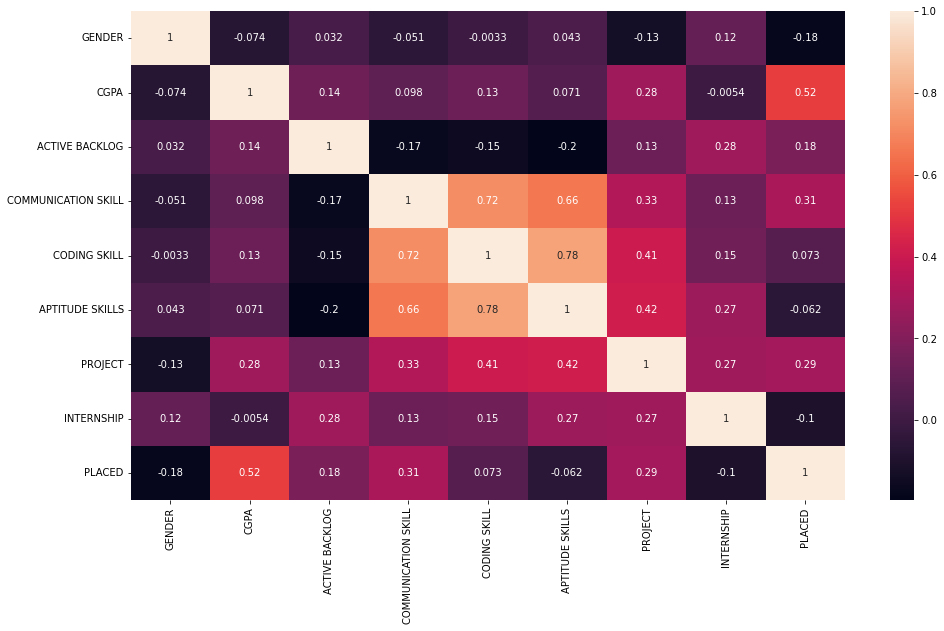

In [35]:
plt.figure(figsize=(16,9))
sns.heatmap(sde.corr(),annot=True)

In [36]:
xs=sde.drop('PLACED',axis=1)

In [37]:
ys=sde[['PLACED']]

## Data Splitting

In [38]:
from sklearn.model_selection import train_test_split

In [39]:
xs_train, xs_test, ys_train ,ys_test=train_test_split(xs,ys,test_size=0.30, random_state=310)

## Model training and testing

In [40]:
from sklearn.metrics import accuracy_score

In [41]:
from sklearn.linear_model import LogisticRegression
lg=LogisticRegression()

### Logistic Regression

In [42]:
lg.fit(xs_train,ys_train)

LogisticRegression()

In [43]:
ys_pred_lg=lg.predict(xs_test)

### Decision Tree

In [44]:
from sklearn.tree import DecisionTreeClassifier
dtc=DecisionTreeClassifier()

In [45]:
dtc=DecisionTreeClassifier()

In [46]:
dtc.fit(xs_train, ys_train)

DecisionTreeClassifier()

In [47]:
ys_pred_dtc=dtc.predict(xs_test)

### Random Forest

In [48]:
from sklearn.ensemble import RandomForestClassifier

In [49]:
rf=RandomForestClassifier()

In [50]:
rf=RandomForestClassifier(n_estimators=250)

In [51]:
rf.fit(xs_train,ys_train)

RandomForestClassifier(n_estimators=250)

In [52]:
ys_pred_rf=rf.predict(xs_test)

In [53]:
### Precisio

In [54]:
from sklearn.metrics import precision_score

In [55]:
precision_score(ys_test,ys_pred_lg)*100

85.71428571428571

In [56]:
precision_score(ys_test,ys_pred_dtc)

1.0

In [57]:
precision_score(ys_test,ys_pred_rf)

1.0

In [58]:
from sklearn.metrics import confusion_matrix

In [59]:
confusion_matrix(ys_test,ys_pred_rf)

array([[11,  0],
       [ 2,  7]], dtype=int64)